In [2]:
from utilities import startup
provider = startup(check=False)

Account enabled


## GHZ Circuit Generator Depth Plots

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from ghzstate import GHZState

from qiskit.visualization import plot_gate_map, plot_coupling_map

In [3]:
backend = provider.get_backend('ibm_washington')
test = GHZState(backend)

circ, layout = test.gen_ghz_circuit(10, 63)

In [4]:
circ.draw()

┌───┐                                             
q_0: ┤ H ├──■────■─────────────────────────────────────
     └───┘┌─┴─┐  │                                     
q_1: ─────┤ X ├──┼────■──────────────■─────────────────
          └───┘┌─┴─┐  │              │                 
q_2: ──────────┤ X ├──┼─────────■────┼─────────────────
               └───┘┌─┴─┐       │    │                 
q_3: ───────────────┤ X ├──■────┼────┼─────────────────
                    └───┘┌─┴─┐  │    │                 
q_4: ────────────────────┤ X ├──┼────┼──────────────■──
                         └───┘┌─┴─┐  │              │  
q_5: ─────────────────────────┤ X ├──┼────■─────────┼──
                              └───┘┌─┴─┐  │         │  
q_6: ──────────────────────────────┤ X ├──┼────■────┼──
                                   └───┘┌─┴─┐  │    │  
q_7: ───────────────────────────────────┤ X ├──┼────┼──
                                        └───┘┌─┴─┐  │  
q_8: ────────────────────────────────────────┤ X ├──┼──
                                             └───┘┌─┴─┐
q_9: ─────────────────────────────────────────────┤ X ├
                                                  └───┘

In [5]:
def calc_d(n):
    return 0.5*(np.sqrt(8*(n) - 7) - 1)

BackendPropertyError: "Couldn't find the property 'T1' for qubit 109."

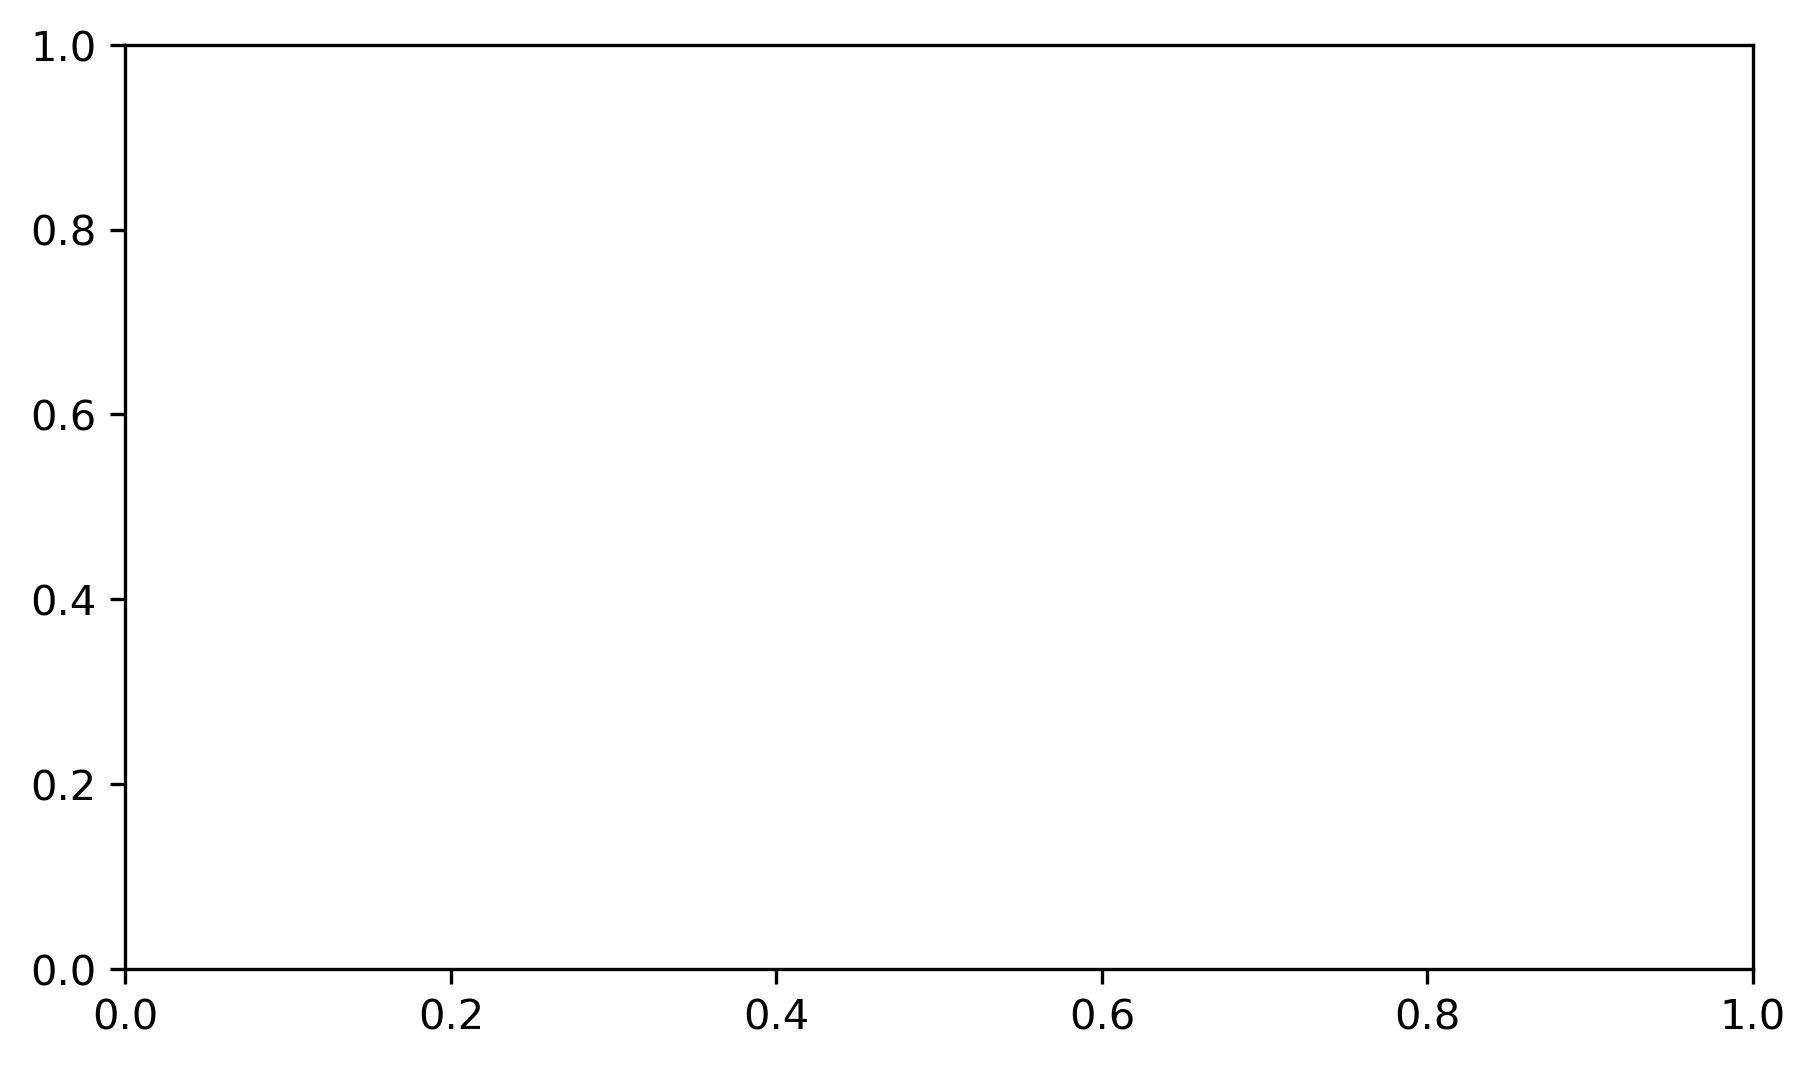

In [6]:
backend = provider.get_backend('ibm_washington')
ghz = GHZState(backend)

fig, ax = plt.subplots(figsize=(7, 4), dpi=300)

n = len(backend.properties().qubits)
X = [i for i in range(1, n)]
Y0 = [calc_d(i) for i in range(1, n)]
Y1 = [ghz.gen_circ_instr(i, 63)[2] for i in range(1, n)]
Y2 = [ghz.gen_circ_instr(i, 0)[2] for i in range(1, n)]

ax.plot(X, Y0, label='Theoretical Least Depth')
ax.plot(X, Y1, label='GHZgen (Source Qubit: 0)')
ax.plot(X, Y2, label='GHZgen (Source Qubit: 63)')

ax.set_xlabel('GHZ Size (Qubits)')
ax.set_ylabel('CNOT Depth')
ax.grid()
ax.legend()

fig.savefig('output/ghzdepthplot', bbox_inches='tight')

## Device Calibration for Measurement Error Mitigation (mthree)

In [3]:
from utilities import run_cal, load_cal

In [2]:
backend = provider.get_backend('ibm_sherbrooke')
#backend = provider.get_backend('ibm_washington')
#backend = provider.get_backend('ibmq_guadalupe')

mit = run_cal(backend)

NameError: name 'run_cal' is not defined

In [ ]:
mit = load_cal(backend)
mit.single_qubit_cals

## GHZ Analysis (ibm_washington)

In [4]:
from time import time

from ghzstate import GHZState
from utilities import run_cal, load_cal

In [3]:
backend = provider.get_backend('ibm_sherbrooke')
#backend = provider.get_backend('ibm_washington')
ghz = GHZState(backend)

ghz_circ, initial_layout = ghz.gen_ghz_circuit(32, 73)
fid_circuits = ghz.gen_fid_circuits(delays=[0])
print('GHZ Circuit Depth:', ghz_circ.depth())
print('Initial Qubit:', initial_layout[0])

GHZ Circuit Depth: 8
Initial Qubit: 63


In [4]:
job = ghz.run_circuits()
mit = run_cal(backend)
ghz.load_cal()

print("GHZ Size:", len(initial_layout))
print("Job ID:", job.job_id())

#job = backend.retrieve_job('63f5574a5ddc109053307ea1')

pop_counts, mqc_counts = ghz.counts_from_result(job.result())
time0 = time()
pop_counts_mit, mqc_counts_mit = ghz.mitigate_counts(pop_counts, mqc_counts)
time1 = time()
print(f'Mitigation Time: {time1 - time0:.2f} s')

fidel, pop, coh = ghz.calc_fidelity(pop_counts, mqc_counts)
fidel_mit, pop_mit, coh_mit = ghz.calc_fidelity(pop_counts_mit, mqc_counts_mit)

print('Fidelity:', fidel)
print('Fidelity (mthree):', fidel_mit)

Job ID: 64080e0b1759865aa5979981
GHZ Size: 32
Job ID: 64080e0b1759865aa5979981
Mitigation Time: 787.09 s
Fidelity: 0.1625118658604812
Fidelity (mthree): 0.2787326647488635


## Error Correlations

In [6]:
from time import time

from ghzstate import GHZState
from utilities import startup, list_retrieve_jobs, run_cal, load_cal
provider = startup(check=False)

Account enabled


In [4]:
backend = provider.get_backend('ibm_sherbrooke')
#backend = provider.get_backend('ibm_washington')

size = 32

#### Source 42

In [5]:
source = 42

ghz1 = GHZState(backend)
ghz_circ1, initial_layout1 = ghz1.gen_ghz_circuit(size, source)
fid_circuits1 = ghz1.gen_fid_circuits(delays=[0])
print('Source Qubit:', initial_layout1[0])
print('GHZ Circuit Depth:', ghz_circ1.depth())

job1 = ghz1.run_circuits()
list_retrieve_jobs([job1.job_id()])

cal = run_cal(backend, initial_layout=initial_layout1, filename=f'calibrations/ibm_{backend.name}_{size}_{source}')

Source Qubit: 42
GHZ Circuit Depth: 8
Job ID: ch993no1l2f3uq933b20
job1 = provider.backend.retrieve_job('ch993no1l2f3uq933b20')


NameError: name 'run_cal' is not defined

In [8]:
cal = run_cal(backend, initial_layout=initial_layout1, filename=f'calibrations/ibm_{backend.name}_{size}_{source}')

TypeError: 'str' object is not callable

In [ ]:
nomit1, mit1 = fidel_from_result(ghz1, job1.result(), cal)

#### Source 63

In [ ]:
source = 63

ghz2 = GHZState(backend)
ghz_circ2, initial_layout2 = ghz2.gen_ghz_circuit(size, source)
fid_circuits2 = ghz2.gen_fid_circuits(delays=[0])
print('Source Qubit:', initial_layout2[0])
print('GHZ Circuit Depth:', ghz_circ2.depth())

job2 = ghz2.run_circuits()
list_retrieve_jobs([job2.job_id()])

cal = run_cal(backend, filename=f'calibrations/ibm_{backend.name}_{size}_{source}')

In [ ]:
nomit2, mit2 = fidel_from_result(ghz2, job2.result(), cal)

#### Source 73

In [ ]:
source = 73

ghz3 = GHZState(backend)
ghz_circ3, initial_layout3 = ghz3.gen_ghz_circuit(size, source)
fid_circuits3 = ghz3.gen_fid_circuits(delays=[0])
print('Source Qubit:', initial_layout3[0])
print('GHZ Circuit Depth:', ghz_circ3.depth())

job3 = ghz3.run_circuits()
list_retrieve_jobs([job3.job_id()])

cal = run_cal(backend, filename=f'calibrations/ibm_{backend.name}_{size}_{source}')

In [ ]:
nomit3, mit3 = fidel_from_result(ghz3, job3.result(), cal)

## Fidelity vs. Size Plots

In [2]:
from time import time

import mthree

from ghzstate import GHZState
from utilities import startup, run_cal, load_cal
provider = startup(check=False)

Account enabled


In [3]:
def fidel_from_result(ghzstate, result, cal=None, printinfo=True):
    ghzstate.load_cal(cal)
    pop_counts, mqc_counts = ghzstate.counts_from_result(result)
    time0 = time()
    pop_counts_mit, mqc_counts_mit = ghzstate.mitigate_counts(pop_counts, mqc_counts)
    time1 = time()
    
    nomit = ghzstate.calc_fidelity(pop_counts, mqc_counts)
    mit = ghzstate.calc_fidelity(pop_counts_mit, mqc_counts_mit)
    
    if printinfo is True:
        print(f'Mitigation Time: {time1 - time0:.2f} s')
        print(f'Fidelity: {nomit[0]}')
        print(f'Fidelity (mthree): {mit[0]}')
    
    return nomit, mit

def fidel_from_result_multi(ghzstate, results, cal=None, printinfo=True):
    nomit = []
    mit = []
    time0 = time()
    
    ghzstate.load_cal(cal)
    for result in results:
        pop_counts, mqc_counts = ghzstate.counts_from_result(result)
        pop_counts_mit, mqc_counts_mit = ghzstate.mitigate_counts(pop_counts, mqc_counts)

        nomit.append(ghzstate.calc_fidelity(pop_counts, mqc_counts))
        mit.append(ghzstate.calc_fidelity(pop_counts_mit, mqc_counts_mit))
    time1 = time()
    
    if printinfo is True:
        print(f'Mitigation Time ({len(results)} experiments): {time1 - time0:.2f} s')
    
    return nomit, mit

def mitigate_counts(ghz, pop_counts, mqc_counts):

        pop_counts_mit = pop_counts.copy()
        mqc_counts_mit = mqc_counts.copy()

        for t, counts in pop_counts.items():
            counts_mit = ghz.mit.apply_correction(counts, ghz.initial_layout)
            counts_mit = counts_mit.nearest_probability_distribution()
            # Un-normalize
            for bitstr, count in counts_mit.items():
                counts_mit[bitstr] = count*ghz.shots
            pop_counts_mit[t] = counts_mit

        for t, counts in mqc_counts.items():
            counts_mit = ghz.mit.apply_correction(counts, ghz.initial_layout)
            counts_mit = counts_mit.nearest_probability_distribution()
            # Un-normalize
            for i, counts_dict in enumerate(counts_mit):
                for bitstr, count in counts_dict.items():
                    counts_mit[i][bitstr] = count*ghz.shots

            mqc_counts_mit[t] = counts_mit

        return pop_counts_mit, mqc_counts_mit
    
def plot_mqc(mqc_counts):
    
    counts = np.round(np.sum(list(mqc_counts['t0'][0].values())))
    n = len(mqc_counts['t0'])
    nghz = int((n-2)/2)
    Y = np.zeros(n)
    X = np.linspace(0, 2*np.pi, n)
    
    for i, cdict in enumerate(mqc_counts['t0']):
        S = cdict['0' * nghz]/counts
        Y[i] = S
        
    fig, ax = plt.subplots()
    ax.plot(X, Y)
    #ax.set_ylim(0, 0.5)
    
    return X, Y

In [10]:
shots = 4196
source = 73

In [10]:
cal = load_cal(filename='calibrations/ibm_washington32_cal')
#cal = load_cal(filename='calibrations/ibm_washington50_cal')
#cal = load_cal(filename='calibrations/ibm_washington_cal')
#cal = mthree.M3Mitigation(backend)
#cal.cals_from_system(ghz32.initial_layout, shots=8192, method='marginal')
#cal.cals_to_file('calibrations/ibm_washington_cal2')

#### GHZ Size: 27

In [11]:
size = 27
backend = provider.get_backend('ibm_washington')
ghz27 = GHZState(backend)
ghz_circ27, initial_layout27 = ghz27.gen_ghz_circuit(size, 73)
fid_circuits27 = ghz27.gen_fid_circuits(delays=[0])
print('Source Qubit:', initial_layout27[0])
print('GHZ Size:', size)
print('GHZ Circuit Depth:', ghz_circ27.depth())

Source Qubit: 73
GHZ Size: 27
GHZ Circuit Depth: 8


In [6]:
job27_0 = ghz27.run_circuits(printid=True, shots=shots)
#job27_1 = ghz27.run_circuits(printid=True, shots=shots)
#job27_2 = ghz27.run_circuits(printid=True, shots=shots)
#job27_3 = ghz27.run_circuits(printid=True, shots=shots)
#job27_4 = ghz27.run_circuits(printid=True, shots=shots)

#cal = run_cal(backend, filename='calibrations/ibm_washington27_cal')
cal = mthree.M3Mitigation(backend)
cal.cals_from_system(ghz27.initial_layout, shots=8192, method='marginal')
cal.cals_to_file('calibrations/ibm_washington27_cal_0523')

Job ID: 645129ab6a9ff67558658add


In [12]:
cal = load_cal(backend, filename='calibrations/ibm_washington27_cal')
job27_0 = backend.retrieve_job('645129ab6a9ff67558658add')
#job27_0 = backend.retrieve_job('634eab0ddac048e10c00bd33')
#job27_1 = backend.retrieve_job('634eab1292d404a35ed937ad')
#job27_2 = backend.retrieve_job('634eab174eaf8b07950c7e11')
#job27_3 = backend.retrieve_job('634eab1ba7f7edff2c69e8f4')
#job27_4 = backend.retrieve_job('634eab26e53c009dc700b42f')

In [13]:
nomit0, mit0 = fidel_from_result(ghz27, job27_0.result(), cal)
#nomit1, mit1 = fidel_from_result(ghz27, job27_1.result(), cal)
#nomit2, mit2 = fidel_from_result(ghz27, job27_2.result(), cal)
#nomit3, mit3 = fidel_from_result(ghz27, job27_3.result(), cal)
#nomit4, mit4 = fidel_from_result(ghz27, job27_4.result(), cal)

Mitigation Time: 9.93 s
Fidelity: 0.3349687117089698
Fidelity (mthree): 0.6256273285909741


#### GHZ Size: 28

In [24]:
size = 28
backend = provider.get_backend('ibm_washington')
ghz28 = GHZState(backend)
ghz_circ28, initial_layout28 = ghz28.gen_ghz_circuit(size, source)
fid_circuits28 = ghz28.gen_fid_circuits(delays=[0])
print('Source Qubit:', initial_layout28[0])
print('GHZ Size:', size)
print('GHZ Circuit Depth:', ghz_circ28.depth())

Source Qubit: 73
GHZ Size: 28
GHZ Circuit Depth: 8


In [38]:
job28_0 = ghz28.run_circuits(printid=True, shots=shots)
job28_1 = ghz28.run_circuits(printid=True, shots=shots)
job28_2 = ghz28.run_circuits(printid=True, shots=shots)
job28_3 = ghz28.run_circuits(printid=True, shots=shots)
job28_4 = ghz28.run_circuits(printid=True, shots=shots)

#cal = run_cal(backend, filename='calibrations/ibm_washington28_cal')
#cal = mthree.M3Mitigation(backend)
#cal.cals_from_system(ghz28.initial_layout, shots=8192, method='marginal')
#cal.cals_to_file('calibrations/ibm_washington28_cal1')

Job ID: 635db694f4e3dd42f8f46c14
Job ID: 635db69bf4e3dd4aecf46c15
Job ID: 635db6a249bfe90c39d1a695
Job ID: 635db6a92227c6ff2f97ce22
Job ID: 635db6b122eb4b66e60872df


In [25]:
nomit0, mit0 = fidel_from_result(ghz28, job28_0.result(), cal)
nomit1, mit1 = fidel_from_result(ghz28, job28_1.result(), cal)
nomit2, mit2 = fidel_from_result(ghz28, job28_2.result(), cal)
nomit3, mit3 = fidel_from_result(ghz28, job28_3.result(), cal)
nomit4, mit4 = fidel_from_result(ghz28, job28_4.result(), cal)

NameError: name 'job28_0' is not defined

#### GHZ Size: 29

In [39]:
size = 29
backend = provider.get_backend('ibm_washington')
ghz29 = GHZState(backend)
ghz_circ29, initial_layout29 = ghz29.gen_ghz_circuit(size, source)
fid_circuits29 = ghz29.gen_fid_circuits(delays=[0])
print('Source Qubit:', initial_layout29[0])
print('GHZ Size:', size)
print('GHZ Circuit Depth:', ghz_circ29.depth())

Source Qubit: 73
GHZ Size: 29
GHZ Circuit Depth: 8


In [ ]:
job29_0 = ghz29.run_circuits(printid=True, shots=shots)
job29_1 = ghz29.run_circuits(printid=True, shots=shots)
job29_2 = ghz29.run_circuits(printid=True, shots=shots)
job29_3 = ghz29.run_circuits(printid=True, shots=shots)
job29_4 = ghz29.run_circuits(printid=True, shots=shots)

#cal = run_cal(backend, filename='calibrations/ibm_washington29_cal')
#cal = mthree.M3Mitigation(backend)
#cal.cals_from_system(ghz29.initial_layout, shots=8192, method='marginal')
#cal.cals_to_file('calibrations/ibm_washington29_cal1')

Job ID: 635db6b94b970298854b5b5b
Job ID: 635db6c019ac6767d40ea590


In [32]:
nomit0, mit0 = fidel_from_result(ghz29, job29_0.result(), cal)
nomit1, mit1 = fidel_from_result(ghz29, job29_1.result(), cal)
nomit2, mit2 = fidel_from_result(ghz29, job29_2.result(), cal)
nomit3, mit3 = fidel_from_result(ghz29, job29_3.result(), cal)
nomit4, mit4 = fidel_from_result(ghz29, job29_4.result(), cal)

Mitigation Time: 15.31 s
Fidelity: 0.25191278867005035
Fidelity (mthree): 0.6135126975118791
Mitigation Time: 22.08 s
Fidelity: 0.21600288833211817
Fidelity (mthree): 0.5161547097359495
Mitigation Time: 19.99 s
Fidelity: 0.2244257012720705
Fidelity (mthree): 0.5392745601995735
Mitigation Time: 18.35 s
Fidelity: 0.2317734299691468
Fidelity (mthree): 0.5582980901216973
Mitigation Time: 18.25 s
Fidelity: 0.23259669093355068
Fidelity (mthree): 0.5573442216746916


#### GHZ Size: 30

In [ ]:
size = 30
backend = provider.get_backend('ibm_washington')
ghz30 = GHZState(backend)
ghz_circ30, initial_layout30 = ghz30.gen_ghz_circuit(size, source)
fid_circuits30 = ghz30.gen_fid_circuits(delays=[0])
print('Source Qubit:', initial_layout30[0])
print('GHZ Size:', size)
print('GHZ Circuit Depth:', ghz_circ30.depth())

In [ ]:
job30_0 = ghz30.run_circuits(printid=True, shots=shots)
job30_1 = ghz30.run_circuits(printid=True, shots=shots)
job30_2 = ghz30.run_circuits(printid=True, shots=shots)
job30_3 = ghz30.run_circuits(printid=True, shots=shots)
job30_4 = ghz30.run_circuits(printid=True, shots=shots)

#cal = run_cal(backend, filename='calibrations/ibm_washington30_cal')
#cal = mthree.M3Mitigation(backend)
#cal.cals_from_system(ghz30.initial_layout, shots=8192, method='marginal')
#cal.cals_to_file('calibrations/ibm_washington30_cal1')

In [31]:
nomit0, mit0 = fidel_from_result(ghz30, job30_0.result(), cal)
nomit1, mit1 = fidel_from_result(ghz30, job30_1.result(), cal)
nomit2, mit2 = fidel_from_result(ghz30, job30_2.result(), cal)
nomit3, mit3 = fidel_from_result(ghz30, job30_3.result(), cal)
nomit4, mit4 = fidel_from_result(ghz30, job30_4.result(), cal)

Mitigation Time: 16.98 s
Fidelity: 0.2590400609543969
Fidelity (mthree): 0.6301798213326036
Mitigation Time: 15.46 s
Fidelity: 0.269400225902245
Fidelity (mthree): 0.649905388818994
Mitigation Time: 14.79 s
Fidelity: 0.2756617931448095
Fidelity (mthree): 0.6586212887564034
Mitigation Time: 15.59 s
Fidelity: 0.25215998150740837
Fidelity (mthree): 0.6252277089057953
Mitigation Time: 15.59 s
Fidelity: 0.24399119498041616
Fidelity (mthree): 0.5869447446360477


#### GHZ Size: 31

In [ ]:
size = 31
backend = provider.get_backend('ibm_washington')
ghz31 = GHZState(backend)
ghz_circ31, initial_layout31 = ghz31.gen_ghz_circuit(size, source)
fid_circuits31 = ghz31.gen_fid_circuits(delays=[0])
print('Source Qubit:', initial_layout31[0])
print('GHZ Size:', size)
print('GHZ Circuit Depth:', ghz_circ31.depth())

In [ ]:
job31_0 = ghz31.run_circuits(printid=True, shots=shots)
job31_1 = ghz31.run_circuits(printid=True, shots=shots)
job31_2 = ghz31.run_circuits(printid=True, shots=shots)
job31_3 = ghz31.run_circuits(printid=True, shots=shots)
job31_4 = ghz31.run_circuits(printid=True, shots=shots)

#cal = run_cal(backend, filename='calibrations/ibm_washington31_cal')
#cal = mthree.M3Mitigation(backend)
#cal.cals_from_system(ghz31.initial_layout, shots=8192, method='marginal')
#cal.cals_to_file('calibrations/ibm_washington31_cal1')

In [ ]:
job27_0 = backend.retrieve_job('635bddb22227c60f4597c924')
job27_1 = backend.retrieve_job('635bddb919ac6741fe0ea0d0')
job27_2 = backend.retrieve_job('')
job27_3 = backend.retrieve_job('')
job27_4 = backend.retrieve_job('')

In [30]:
nomit0, mit0 = fidel_from_result(ghz31, job31_0.result(), cal)
nomit1, mit1 = fidel_from_result(ghz31, job31_1.result(), cal)
nomit2, mit2 = fidel_from_result(ghz31, job31_2.result(), cal)
nomit3, mit3 = fidel_from_result(ghz31, job31_3.result(), cal)
nomit4, mit4 = fidel_from_result(ghz31, job31_4.result(), cal)

Mitigation Time: 20.24 s
Fidelity: 0.21830068773855774
Fidelity (mthree): 0.5503411665719917
Mitigation Time: 21.43 s
Fidelity: 0.22749402450674103
Fidelity (mthree): 0.5775274227518703
Mitigation Time: 20.99 s
Fidelity: 0.22499923702327929
Fidelity (mthree): 0.5664674514799666
Mitigation Time: 22.69 s
Fidelity: 0.21594710105388715
Fidelity (mthree): 0.549558472813636
Mitigation Time: 23.90 s
Fidelity: 0.21502903181144478
Fidelity (mthree): 0.5447347515840274


#### GHZ Size: 32

In [ ]:
size = 32
backend = provider.get_backend('ibm_washington')
ghz32 = GHZState(backend)
ghz_circ32, initial_layout32 = ghz32.gen_ghz_circuit(size, source)
fid_circuits32 = ghz32.gen_fid_circuits(delays=[0])
print('Source Qubit:', initial_layout32[0])
print('GHZ Size:', size)
print('GHZ Circuit Depth:', ghz_circ32.depth())

In [ ]:
job32_0 = ghz32.run_circuits(printid=True, shots=shots)
job32_1 = ghz32.run_circuits(printid=True, shots=shots)
job32_2 = ghz32.run_circuits(printid=True, shots=shots)
job32_3 = ghz32.run_circuits(printid=True, shots=shots)
job32_4 = ghz32.run_circuits(printid=True, shots=shots)

#cal = run_cal(backend, filename='calibrations/ibm_washington32_cal')
cal = mthree.M3Mitigation(backend)
cal.cals_from_system(ghz32.initial_layout, shots=8192, method='marginal')
cal.cals_to_file('calibrations/ibm_washington_cal')

In [ ]:
job27_0 = backend.retrieve_job('635b5cdc0b130e4a687f18f4')
job27_1 = backend.retrieve_job('635b5cd82227c6304697c779')
job27_2 = backend.retrieve_job('')
job27_3 = backend.retrieve_job('')
job27_4 = backend.retrieve_job('')

In [29]:
cal = load_cal(filename='calibrations/ibm_washington32_cal')
#cal = load_cal(filename='calibrations/ibm_washington50_cal')

nomit32_0, mit32_0 = fidel_from_result(ghz32, job32_0.result(), cal)
nomit32_1, mit32_1 = fidel_from_result(ghz32, job32_1.result(), cal)
nomit32_2, mit32_2 = fidel_from_result(ghz32, job32_2.result(), cal)
nomit32_3, mit32_3 = fidel_from_result(ghz32, job32_3.result(), cal)
nomit32_4, mit32_4 = fidel_from_result(ghz32, job32_4.result(), cal)

Mitigation Time: 19.42 s
Fidelity: 0.21547277031297268
Fidelity (mthree): 0.5971835784348596
Mitigation Time: 22.70 s
Fidelity: 0.20741312835578474
Fidelity (mthree): 0.5761731801865466
Mitigation Time: 27.46 s
Fidelity: 0.20402699536016977
Fidelity (mthree): 0.5718554856135929
Mitigation Time: 25.12 s
Fidelity: 0.2155123755692392
Fidelity (mthree): 0.5792033315798149
Mitigation Time: 28.72 s
Fidelity: 0.21865957043257467
Fidelity (mthree): 0.6120316966723314


#### GHZ Size: 33

In [26]:
size = 33
backend = provider.get_backend('ibm_washington')
ghz33 = GHZState(backend)
ghz_circ33, initial_layout33 = ghz33.gen_ghz_circuit(size, source)
fid_circuits33 = ghz33.gen_fid_circuits(delays=[0])
print('Source Qubit:', initial_layout33[0])
print('GHZ Size:', size)
print('GHZ Circuit Depth:', ghz_circ33.depth())

Source Qubit: 73
GHZ Size: 33
GHZ Circuit Depth: 9


In [23]:
job33_0 = ghz33.run_circuits(printid=True)
job33_1 = ghz33.run_circuits(printid=True)
job33_2 = ghz33.run_circuits(printid=True)
job33_3 = ghz33.run_circuits(printid=True)
job33_4 = ghz33.run_circuits(printid=True)
#job33_5 = ghz33.run_circuits(printid=True)

#cal = run_cal(backend, filename='calibrations/ibm_washington33_cal')

Job ID: 6343cc800a4a0c804bd018d4
Job ID: 6343cc8cea97baa29ee17ecf
Job ID: 6343cc91cbdc4dc698c0f03c
Job ID: 6343cc96d31ce7698cd80cfa
Job ID: 6343cc9c34425f481aca406b
Job ID: 6343cca168409fefbd2c53ea


In [27]:
cal = load_cal(backend, filename='calibrations/ibm_washington33_cal')

job33_0 = backend.retrieve_job('6343cc800a4a0c804bd018d4')
job33_1 = backend.retrieve_job('6343cc8cea97baa29ee17ecf')
job33_2 = backend.retrieve_job('6343cc91cbdc4dc698c0f03c')
job33_3 = backend.retrieve_job('6343cc96d31ce7698cd80cfa')
job33_4 = backend.retrieve_job('6343cc9c34425f481aca406b')
job33_5 = backend.retrieve_job('6343cca168409fefbd2c53ea')

In [ ]:
nomit33_0, mit33_0 = fidel_from_result(ghz33, job33_0.result(), cal)
nomit33_1, mit33_1 = fidel_from_result(ghz33, job33_1.result(), cal)
nomit33_2, mit33_2 = fidel_from_result(ghz33, job33_2.result(), cal)
nomit33_3, mit33_3 = fidel_from_result(ghz33, job33_3.result(), cal)
nomit33_4, mit33_4 = fidel_from_result(ghz33, job33_4.result(), cal)
nomit33_5, mit33_5 = fidel_from_result(ghz33, job33_5.result(), cal)

#### Calibration

In [ ]:
ghz50 = GHZState(backend)
ghz_circ50, initial_layout50 = ghz32.gen_ghz_circuit(size, source)

import mthree
mit = mthree.M3Mitigation(backend)
mit.cals_from_system(initial_layout50, shots=8192)
mit.cals_to_file('calibrations/ibm_washington50_cal')